## Create corpus stat JSONs

### proxy

In [7]:
%%bash
java -Xmx2g -jar ../../deps/gramr/gramr.jar ../scripts/corpusStats.sc --corpus ../../data/processed/training/amr-release-1.0-training-proxy.txt --output output

21:47:38 Selected alignments: jamr+tamr+amr_ud+isi-vote1
21:47:38 Logging to output
21:47:38 Selected grammar: all
21:47:38 Loading AMR corpus ../../data/processed/training/amr-release-1.0-training-proxy.txt
21:47:50 Loaded 6603 examples


In [5]:
%%bash
java -Xmx2g -jar ../../deps/gramr/gramr.jar ../scripts/corpusStats.sc --corpus ../../data/processed/test/amr-release-1.0-test-proxy.txt --output output

21:46:46 Selected alignments: jamr+tamr+amr_ud+isi-vote1
21:46:46 Logging to output
21:46:46 Selected grammar: all
21:46:46 Loading AMR corpus ../../data/processed/test/amr-release-1.0-test-proxy.txt
21:46:49 Loaded 823 examples


### consensus

In [8]:
%%bash
java -jar ../../deps/gramr/gramr.jar ../scripts/corpusStats.sc --corpus ../../data/processed/consensus/consensus-dev.annotated.txt --output output

21:49:27 Selected alignments: jamr+tamr+amr_ud+isi-vote1
21:49:27 Logging to output
21:49:28 Selected grammar: all
21:49:28 Loading AMR corpus ../../data/processed/consensus/consensus-dev.annotated.txt
21:49:29 Loaded 100 examples


In [9]:
import json
import pandas as pd

## Load JSONs

In [10]:
with open('output/amr-release-1.0-training-proxy.txt.json') as f:
    proxy_train_data = json.load(f)

In [11]:
with open('output/amr-release-1.0-test-proxy.txt.json') as f:
    proxy_test_data = json.load(f)

In [12]:
with open('output/consensus-dev.annotated.txt.json') as f:
    consensus_data = json.load(f)

## Sentence length statistics

In [13]:
def sentence_lengths(json_dict):
    s = pd.Series({k: v['sentenceLength'] for k, v in json_dict['examples'].items()})
    return s

In [14]:
sentence_lengths_df = pd.concat([sentence_lengths(proxy_train_data), sentence_lengths(consensus_data)], keys=['proxy_train', 'consensus'])

### Median sentence length

In [17]:
{'proxy': sentence_lengths_df['proxy_train'].median(),
 'consensus': sentence_lengths_df['consensus'].median()}

{'proxy': 17.0, 'consensus': 21.0}

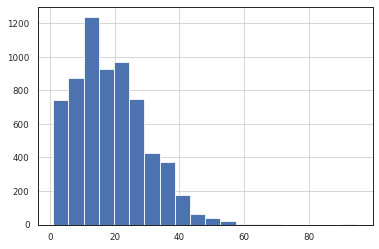

In [18]:
sentence_lengths_proxy_plot = sentence_lengths_df['proxy_train'].hist(bins=20)
sentence_lengths_proxy_plot.get_figure().savefig('sentence_lengths_proxy.png')

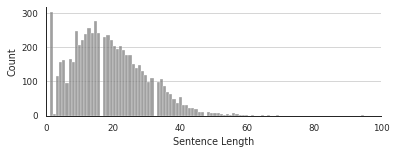

In [30]:
# Print-quality plot
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme('paper')
sns.set_style('white')
fig, ax = plt.subplots(figsize=(6, 2))
ax.set_xlabel('Sentence Length')
ax.set_ylabel('Count')
plt.xlim(0, 100)

sns.despine()
sns.histplot(sentence_lengths_df['proxy_train'].values, bins=100, color='grey')
ax.grid(axis='y')

import tikzplotlib

tikzplotlib.save("sentence_lengths_proxy.tex", axis_width='12cm', axis_height='4cm', extra_axis_parameters=['xmajorticks=true', 'ymajorticks=true'])

plt.show()


In [17]:
sentence_lengths_df['proxy_train'].describe()

count    6603.000000
mean       18.667424
std        10.857576
min         1.000000
25%        11.000000
50%        17.000000
75%        26.000000
max        95.000000
dtype: float64

<AxesSubplot:>

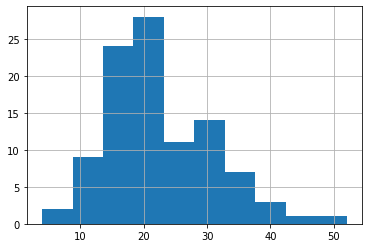

In [7]:
sentence_lengths_df['consensus'].hist()

<AxesSubplot:>

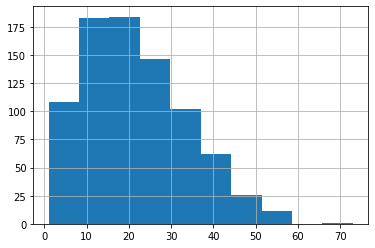

In [14]:
sentence_lengths(proxy_test_data).hist()

In [16]:
sentence_lengths(proxy_test_data).describe()

count    823.000000
mean      21.543135
std       12.223298
min        1.000000
25%       13.000000
50%       20.000000
75%       29.000000
max       73.000000
dtype: float64

In [18]:
proxy_test_lengths = sentence_lengths(proxy_test_data)

In [23]:
len(proxy_test_lengths[proxy_test_lengths > 50])

13

## Combinator statistics

In [25]:
def combinator_stats(json_dict):
    s = pd.Series(json_dict['combinators']['all'])
    norm = (s / s.sum()).sort_values(ascending=False)
    return norm

In [26]:
proxy_s = combinator_stats(proxy_data)
consensus_s = combinator_stats(consensus_data)
cmb_df = pd.concat([proxy_s, consensus_s], keys=['proxy', 'consensus'], axis=1)

In [27]:
cmb_df

proxy  consensus
fa       5.435808e-01   0.546526
ba       1.831745e-01   0.186322
lex      1.643414e-01   0.138331
rp       4.795045e-02   0.067846
conj     3.556597e-02   0.029185
fc       1.307478e-02   0.009439
bx       8.675422e-03   0.008535
tr       2.369385e-03   0.003183
tc-nmod  5.035165e-04        NaN
lp       4.002500e-04   0.000036
tc-rel   3.628324e-04   0.004014
gfc      5.892528e-07        NaN
lcomma            NaN   0.004159
merge             NaN   0.002278
conjnp            NaN   0.000036
scomma            NaN   0.000036
sflip             NaN   0.000036
conjadj           NaN   0.000036

<AxesSubplot:>

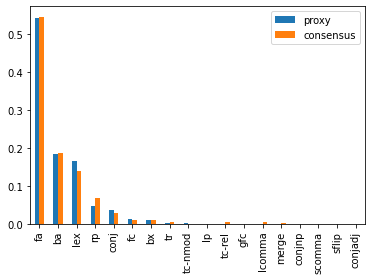

In [28]:
cmb_df.plot(kind='bar')

### Proxy combinator distribution

In [46]:
latex = r'''\documentclass{standalone}
\usepackage{booktabs}

\begin{document}
\begin{tabular}{lrrr}
  \toprule
  \textbf{Combinator} & \textbf{Frequency}\\
  \midrule
'''

for k, v in proxy_s.items():
    pct = v * 100.0
    latex += f'  {k} & {pct:.2f} \\%\\\\\n'

latex += r'''  \bottomrule
\end{tabular}
\end{document}'''
with open('proxy_combinator_stats.tex', 'w') as f:
    f.write(latex)